<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Barcelona= pd.read_csv("Barcelona(Cataluña).csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  18927 non-null  object 
 1   source                                        18927 non-null  object 
 2   name                                          18927 non-null  object 
 3   description                                   18189 non-null  object 
 4   neighborhood_overview                         9154 non-null   object 
 5   host_id                                       18927 non-null  int64  
 6   host_name                                     18924 non-null  object 
 7   host_since                                    18924 non-null  object 
 8   host_location                                 14551 non-null  object 
 9   host_about                                    12152 non-null 

**Determinación de Clases para datos agrupados**


In [4]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [5]:
#Corroboramos valores nulos
valores_nulos=Barcelona.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       738
neighborhood_overview                            9773
host_id                                             0
host_name                                           3
host_since                                          3
host_location                                    4376
host_about                                       6775
host_response_time                               2890
host_response_rate                               2890
host_acceptance_rate                             2744
host_is_superhost                                 567
host_neighbourhood                               9776
host_listings_count                                 3
host_total_listings_count                           3
host_verifications                                  3
host_has_profile_pic        

In [6]:
#Calculamos el numero total de la población "n"
Barcelona['review_scores_value']. info()
n=18927

<class 'pandas.core.series.Series'>
RangeIndex: 18927 entries, 0 to 18926
Series name: review_scores_value
Non-Null Count  Dtype  
--------------  -----  
13926 non-null  float64
dtypes: float64(1)
memory usage: 148.0 KB


In [7]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Barcelona['review_scores_value'].max()
Min=Barcelona['review_scores_value'].min()
Limites= [Min, Max]
Limites

[0.0, 5.0]

In [8]:
#Calculamos el rango R
R=Max-Min
R

5.0

In [10]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(18927)
ni

15.199911516657144

In [11]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

0.3289492833244881

**Creación de Categorias a partir de clases**

In [12]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-.99, 5.1, 16)
intervalos

array([-0.99 , -0.584, -0.178,  0.228,  0.634,  1.04 ,  1.446,  1.852,
        2.258,  2.664,  3.07 ,  3.476,  3.882,  4.288,  4.694,  5.1  ])

In [13]:
#Creamos las categorías 
categorias= ["Categoría1 (0-1.2 review_scores_value)", "Categoría2 (1.3-1.5 review_scores_value)","Categoría3 (1.6-1.8 review_scores_value)", "Categoría4 (1.9-2 review_scores_value)",
             "Categoría5 (2.1-2.3 review_scores_value)", "Categoría6 (2.4-2.6 review_scores_value)","Categoría7 (2.7-2.9 review_scores_value)", "Categoría8 (3-3.1 review_scores_value)", "Categoría9 (3.2-3.4 review_scores_value)", "Categoría10 (3.5-3.7 review_scores_value)","Categoría11 (3.8-4 review_scores_value)", "Categoría12 (4.1-4.2 review_scores_value)",
             "Categoría13 (4.3-4.5 review_scores_value)", "Categoría14 (4.6-4.8 review_scores_value)","Categoría15 (4.9-5.1 review_scores_value)"
             ]

In [14]:
#Finalmente creamos las categorías en la columna numérica
Barcelona['review_scores_value']=pd.cut(x= Barcelona['review_scores_value'], bins=intervalos, labels= categorias)
Barcelona['review_scores_value']

0        Categoría13 (4.3-4.5 review_scores_value)
1        Categoría14 (4.6-4.8 review_scores_value)
2        Categoría14 (4.6-4.8 review_scores_value)
3        Categoría13 (4.3-4.5 review_scores_value)
4        Categoría13 (4.3-4.5 review_scores_value)
5        Categoría14 (4.6-4.8 review_scores_value)
6        Categoría14 (4.6-4.8 review_scores_value)
7        Categoría14 (4.6-4.8 review_scores_value)
8        Categoría15 (4.9-5.1 review_scores_value)
9        Categoría14 (4.6-4.8 review_scores_value)
10       Categoría15 (4.9-5.1 review_scores_value)
11       Categoría13 (4.3-4.5 review_scores_value)
12       Categoría14 (4.6-4.8 review_scores_value)
13       Categoría15 (4.9-5.1 review_scores_value)
14       Categoría14 (4.6-4.8 review_scores_value)
15       Categoría14 (4.6-4.8 review_scores_value)
16       Categoría15 (4.9-5.1 review_scores_value)
17       Categoría14 (4.6-4.8 review_scores_value)
18       Categoría12 (4.1-4.2 review_scores_value)
19       Categoría15 (4.9-5.1 r

In [15]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Barcelona['review_scores_value'].value_counts().reset_index()
Tabla_freq

review_scores_value  count
0   Categoría14 (4.6-4.8 review_scores_value)   5877
1   Categoría15 (4.9-5.1 review_scores_value)   4931
2   Categoría13 (4.3-4.5 review_scores_value)   2022
3   Categoría12 (4.1-4.2 review_scores_value)    458
4   Categoría10 (3.5-3.7 review_scores_value)    286
5     Categoría11 (3.8-4 review_scores_value)    118
6    Categoría5 (2.1-2.3 review_scores_value)    100
7      Categoría8 (3-3.1 review_scores_value)     87
8    Categoría9 (3.2-3.4 review_scores_value)     38
9    Categoría7 (2.7-2.9 review_scores_value)      8
10   Categoría3 (1.6-1.8 review_scores_value)      1
11     Categoría1 (0-1.2 review_scores_value)      0
12   Categoría2 (1.3-1.5 review_scores_value)      0
13     Categoría4 (1.9-2 review_scores_value)      0
14   Categoría6 (2.4-2.6 review_scores_value)      0

In [16]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

review_scores_value  count
0   Categoría14 (4.6-4.8 review_scores_value)   5877
1   Categoría15 (4.9-5.1 review_scores_value)   4931
2   Categoría13 (4.3-4.5 review_scores_value)   2022
3   Categoría12 (4.1-4.2 review_scores_value)    458
4   Categoría10 (3.5-3.7 review_scores_value)    286
5     Categoría11 (3.8-4 review_scores_value)    118
6    Categoría5 (2.1-2.3 review_scores_value)    100
7      Categoría8 (3-3.1 review_scores_value)     87
8    Categoría9 (3.2-3.4 review_scores_value)     38
9    Categoría7 (2.7-2.9 review_scores_value)      8
10   Categoría3 (1.6-1.8 review_scores_value)      1

In [17]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('review_scores_value')
Filtro_index

count
review_scores_value                             
Categoría14 (4.6-4.8 review_scores_value)   5877
Categoría15 (4.9-5.1 review_scores_value)   4931
Categoría13 (4.3-4.5 review_scores_value)   2022
Categoría12 (4.1-4.2 review_scores_value)    458
Categoría10 (3.5-3.7 review_scores_value)    286
Categoría11 (3.8-4 review_scores_value)      118
Categoría5 (2.1-2.3 review_scores_value)     100
Categoría8 (3-3.1 review_scores_value)        87
Categoría9 (3.2-3.4 review_scores_value)      38
Categoría7 (2.7-2.9 review_scores_value)       8
Categoría3 (1.6-1.8 review_scores_value)       1

Text(0, 0.5, 'Frecuencia')

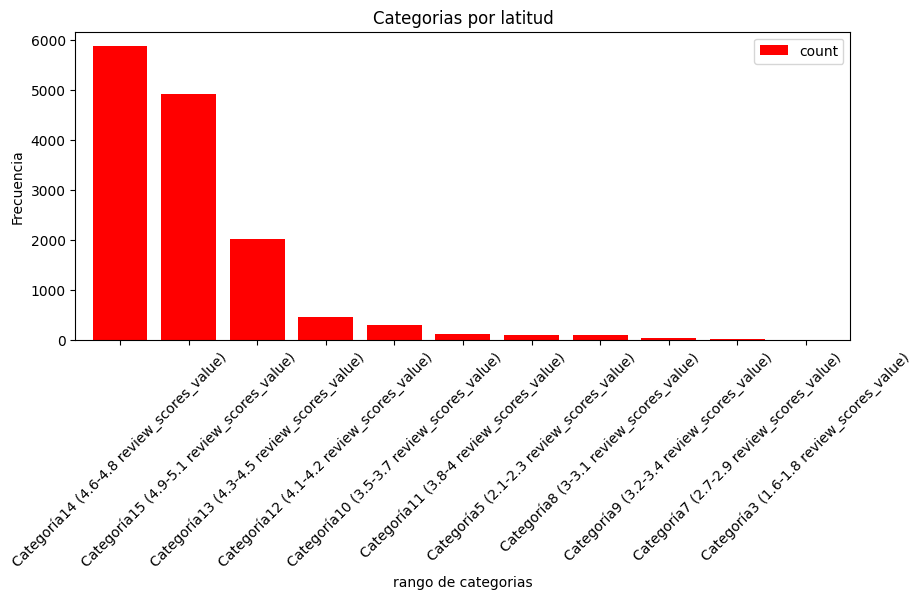

In [18]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')